In [34]:
import os.path
import seaborn as sns
from math import floor
import parameter
import query
import time
import copy
import pickle
from model import Model
import model
from station import Station
import numpy as np
import pandas as pd
from datetime import datetime , timedelta
import matplotlib.pyplot as plt

In [35]:
# parameter.get_station_information(True)

In [36]:
pickle_dir = f'data/station_data/test_whitelist/v1/tph_{4}/'
origin_path = 'data/station_data/status_at_time/2024_6_24_10:34.csv'
end_path = 'data/station_data/status_at_time/2024_6_24_11:41.csv'

origin_time = timedelta(hours= 10 + 7/12)
end_time = timedelta(hours= 11 + 8/12)

stations = pd.read_csv('data/stations.csv', index_col=0)
station_information = pd.read_csv(origin_path, index_col=0)

origin_state = model.get_state(origin_path)
end_state = model.get_state(end_path)
tph = 12

with open('data/station_data/2024 model/v1/all_stations_tph_4.pickle', 'rb') as f:
    station_list = pickle.load(f)

del_list = []
for station in station_list:
    if station not in station_information['name'].values:
        del_list.append(station)
for station in del_list:
    del station_list[station]


model = Model(station_names=station_list.keys(), stations_dict=station_list, in_transit=[], tph=tph)
model.truncate_transitions()
model.refine_by_3()

100 of 2101 done
200 of 2101 done
300 of 2101 done
400 of 2101 done
500 of 2101 done
600 of 2101 done
700 of 2101 done
800 of 2101 done
900 of 2101 done
1000 of 2101 done
1100 of 2101 done
1200 of 2101 done
1300 of 2101 done
1400 of 2101 done
1500 of 2101 done
1600 of 2101 done
1700 of 2101 done
1800 of 2101 done
1900 of 2101 done
2000 of 2101 done
2100 of 2101 done
Stations truncated
100 of 2101 done
200 of 2101 done
300 of 2101 done
400 of 2101 done
500 of 2101 done
600 of 2101 done
700 of 2101 done
800 of 2101 done
900 of 2101 done
1000 of 2101 done
1100 of 2101 done
1200 of 2101 done
1300 of 2101 done
1400 of 2101 done
1500 of 2101 done
1600 of 2101 done
1700 of 2101 done
1800 of 2101 done
1900 of 2101 done
2000 of 2101 done
2100 of 2101 done
Stations refined


In [4]:
len(model.stations_dict)

2101

In [3]:
model.init_state(path=origin_path, time= origin_time - timedelta(hours=3/12))
model.sim()
model.sim()
model.sim()
model.init_state(path=origin_path, time=origin_time)
print(model.mean_sq_error(other_stations=origin_state))
print(model.mean_sq_error(other_stations=end_state))

0.0
11.861494526415992


In [8]:
while model.curr_time < end_time:
    model.sim()
    print(model.curr_time)
    print(len(model.in_transit), 'in transit', model.mean_sq_error(other_stations=end_state))
station_bikes = 0
for station in model.stations_dict.values():
    # print(station.name, 'has', station.curr_bikes, 'bikes')
    station_bikes += station.curr_bikes
print(len(model.in_transit), 'bikes in transit')
print(station_bikes, 'station bikes')
print(len(model.in_transit)+station_bikes, 'total bikes')
print('time:', model.curr_time, 'total_trips:', model.total_trips, 'failures:', model.failures)
print(f'Origin to end state: {model.mean_sq_error(stations_dict=origin_state, other_stations=end_state)}')
print(f'Model state to end state: {model.mean_sq_error(other_stations=end_state)}')
print(f'Origin to model state: {model.mean_sq_error(other_stations=origin_state)}')

10:40:00
1227 in transit 13.047120418848168
10:45:00
1302 in transit 13.955735364112327
10:50:00
1291 in transit 14.98905283198477
10:55:00
1296 in transit 15.511185149928606
11:00:00
1246 in transit 15.527367920038078
11:05:00
1189 in transit 15.935268919562112
11:10:00
1221 in transit 17.083293669681105
11:15:00
1229 in transit 18.039029033793433
11:20:00
1200 in transit 18.21656354117087
11:25:00
1249 in transit 19.012851023322227
11:30:00
1198 in transit 20.184198000951927
11:35:00
1200 in transit 20.837220371251785
11:40:00
1280 in transit 20.663969538315087
1280 bikes in transit
29623 station bikes
30903 total bikes
time: 11:40:00 total_trips: 6758 failures: 1364
Origin to end state: 11.629294755877034
Model state to end state: 20.663969538315087
Origin to model state: 12.457877201332698


In [ ]:
horizontal_squares, vertical_squares, model_clusters = model.cluster_stations(0.0055)
# i, j, origin_clusters = cluster_stations(end_state, 0.004)
# i, j, end_clusters = cluster_stations(origin_state, 0.004)

num_stations = []
num_docks = []
num_bikes_model = []
num_bikes_origin = []
num_bikes_end = []
for y in range(vertical_squares):
    num_stations.append([len(stations) for stations in model_clusters[y * horizontal_squares:(y + 1) * horizontal_squares]])
    num_docks.append([sum([model.stations_dict[station].max_docks for station in stations]) for stations in model_clusters[y * horizontal_squares:(y + 1) * horizontal_squares]])
    num_bikes_model.append([sum([model.stations_dict[station].curr_bikes for station in stations]) for stations in model_clusters[y * horizontal_squares:(y + 1) * horizontal_squares]])
    num_bikes_origin.append([sum([origin_state[station].curr_bikes for station in stations]) for stations in model_clusters[y * horizontal_squares:(y + 1) * horizontal_squares]])
    num_bikes_end.append([sum([end_state[station].curr_bikes for station in stations]) for stations in model_clusters[y * horizontal_squares:(y + 1) * horizontal_squares]])

In [11]:
num_stations = np.array(num_stations)
num_docks = np.array(num_docks)
num_bikes_model = np.array(num_bikes_model)
num_bikes_origin = np.array(num_bikes_origin)
num_bikes_end = np.array(num_bikes_end)

In [7]:
valid_clusters = 0
mape_model_to_end = 0
mape_origin_to_end = 0
mape_origin_to_model = 0

for i in range(vertical_squares):
    for j in range(horizontal_squares):
        if num_stations[i, j] and num_docks[i, j] > 0:
            valid_clusters += 1
            mape_model_to_end += abs(num_bikes_end[i, j] - num_bikes_model[i, j])/num_docks[i, j]
            mape_origin_to_end += abs(num_bikes_end[i, j] - num_bikes_origin[i, j])/num_docks[i, j]
            mape_origin_to_model += abs(num_bikes_model[i, j] - num_bikes_origin[i, j])/num_docks[i, j]

origin_dif = (num_bikes_origin - num_bikes_end)**2
model_dif = (num_bikes_model - num_bikes_end)**2
drift_dif = (num_bikes_model - num_bikes_origin)**2

print()
print(f'Origin to end Squared Error: {np.sum(origin_dif) / valid_clusters}')
print(f'Model to end Mean Squared Error: {np.sum(model_dif) / valid_clusters}')
print(f'Origin to model Mean Squared Error: {np.sum(drift_dif) / valid_clusters}')
print()
print(f'Mean Absolute Percent Error origin to end: {mape_origin_to_end / valid_clusters}')
print(f'Mean Absolute Percent Error model to end: {mape_model_to_end / valid_clusters}')
print(f'Mean Absolute Percent Error origin to model: {mape_origin_to_model / valid_clusters}')



Origin to end Squared Error: 30.40360610263523
Model to end Mean Squared Error: 1795.4077669902913
Origin to model Mean Squared Error: 1752.9680998613037

Mean Absolute Percent Error origin to end: 0.03299976650642145
Mean Absolute Percent Error model to end: 0.2908796015491002
Mean Absolute Percent Error origin to model: 0.2855973641468556


In [13]:
valid_clusters = 0
mape_model_to_end = 0
mape_origin_to_end = 0
mape_origin_to_model = 0

for i in range(vertical_squares):
    for j in range(horizontal_squares):
        if num_stations[i, j] > 0 and num_docks[i, j] > 0:
            valid_clusters += 1
            abs_dif_bikes = abs(num_bikes_end[i, j] - num_bikes_origin[i, j])
            if abs_dif_bikes > 25:
                for station in model_clusters[i * horizontal_squares + j]:
                    if abs(origin_state[station].curr_bikes - end_state[station].curr_bikes) > 15:
                        print(f'Re-balance detected at station: {station}')
                        print(f'Origin: {origin_state[station].curr_bikes}, Model: {model.stations_dict[station].curr_bikes}, End: {end_state[station].curr_bikes}, Docks: {model.stations_dict[station].max_docks}')
                print(f'Cluster: {i * horizontal_squares + j} skipped')
                continue
            mape_model_to_end += abs(num_bikes_end[i, j] - num_bikes_model[i, j])/num_docks[i, j]
            mape_origin_to_end += abs(num_bikes_end[i, j] - num_bikes_origin[i, j])/num_docks[i, j]
        
            # if abs(num_bikes_end[i, j] - num_bikes_model[i, j])/num_docks[i, j] > 0.1:
            #     print(f'Model to end: {num_bikes_model[i, j] - num_bikes_end[i, j]}, {abs(num_bikes_end[i, j] - num_bikes_model[i, j])/num_docks[i, j]}, {num_docks[i, j]}')
                
        if num_bikes_origin[i, j] > 0:
            mape_origin_to_model += abs(num_bikes_model[i, j] - num_bikes_origin[i, j])/num_docks[i, j]

origin_dif = (num_bikes_origin - num_bikes_end)**2
model_dif = (num_bikes_model - num_bikes_end)**2
drift_dif = (num_bikes_model - num_bikes_origin)**2

print()
print(f'Origin to end Squared Error: {np.sum(origin_dif) / valid_clusters}')
print(f'Model to end Mean Squared Error: {np.sum(model_dif) / valid_clusters}')
print(f'Origin to model Mean Squared Error: {np.sum(drift_dif) / valid_clusters}')
print()
print(f'Mean Absolute Percent Error origin to end: {mape_origin_to_end / valid_clusters}')
print(f'Mean Absolute Percent Error model to end: {mape_model_to_end / valid_clusters}')
print(f'Mean Absolute Percent Error origin to model: {mape_origin_to_model / valid_clusters}')


Re-balance detected at station: Broadway & W 56 St
Origin: 19, Model: 38, End: 102, Docks: 117
Re-balance detected at station: W 56 St & 8 Ave
Origin: 39, Model: 32, End: 7, Docks: 50
Cluster: 549 skipped
Re-balance detected at station: W 55 St & 6 Ave
Origin: 69, Model: 72, End: 44, Docks: 77
Re-balance detected at station: Central Park S & 6 Ave
Origin: 27, Model: 18, End: 9, Docks: 73
Re-balance detected at station: 7 Ave & W 55 St
Origin: 36, Model: 47, End: 11, Docks: 67
Cluster: 550 skipped
Re-balance detected at station: 9 Ave & W 22 St
Origin: 0, Model: 11, End: 54, Docks: 61
Cluster: 607 skipped
Cluster: 670 skipped
Cluster: 699 skipped

Origin to end Squared Error: 58.57644628099174
Model to end Mean Squared Error: 86.47727272727273
Origin to model Mean Squared Error: 52.421487603305785

Mean Absolute Percent Error origin to end: 0.02575621688713937
Mean Absolute Percent Error model to end: 0.040100912698474406
Mean Absolute Percent Error origin to model: 0.030224011436504515

In [79]:
cluster_rates = np.zeros(vertical_squares * horizontal_squares)
max = 0
global_max = 0
for t in range(0, 281, 4):
    cluster_rates_0 = []
    cluster_rates_1 = []
    cluster_rates_2 = []
    cluster_rates_3 = []
    for i in range(vertical_squares):
        for j in range(horizontal_squares):
            cluster_rates_0.append(sum([model.stations_dict[station].rate[t] for station in model_clusters[i * horizontal_squares + j]]))
            cluster_rates_1.append(sum([model.stations_dict[station].rate[t+1] for station in model_clusters[i * horizontal_squares + j]]))
            cluster_rates_2.append(sum([model.stations_dict[station].rate[t+2] for station in model_clusters[i * horizontal_squares + j]]))
            cluster_rates_3.append(sum([model.stations_dict[station].rate[t+3] for station in model_clusters[i * horizontal_squares + j]]))
    
    cluster_rates_0 = np.array(cluster_rates_0)
    cluster_rates_1 = np.array(cluster_rates_1)
    cluster_rates_2 = np.array(cluster_rates_2)
    cluster_rates_3 = np.array(cluster_rates_3)
    
    cluster_rates = cluster_rates_0 + cluster_rates_1 + cluster_rates_2 + cluster_rates_3
    cluster_rates = cluster_rates / 4
    max = np.max(cluster_rates)
    if max > global_max:
        global_max = max
        
    ax = plt.axes()
    ax.set_title((timedelta(hours=t/12)))
    sns.heatmap(cluster_rates.reshape(vertical_squares, horizontal_squares), vmin=0, vmax=5, cmap='Reds', ax=ax)
    if t < 10:
        t = f'00{t}'
    elif t < 100:
        t = f'0{t}'
    plt.savefig(f'images/rates/Reds/{t}.png')
    plt.close()

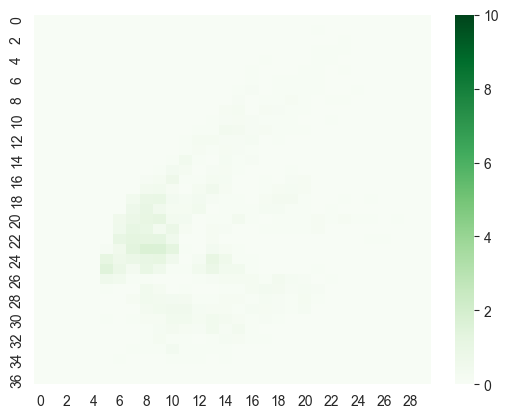

In [69]:
sns.heatmap(cluster_rates.reshape(vertical_squares, horizontal_squares), vmin=0, vmax=10, cmap='Greens')
plt.savefig('images/test.png')

<Axes: >

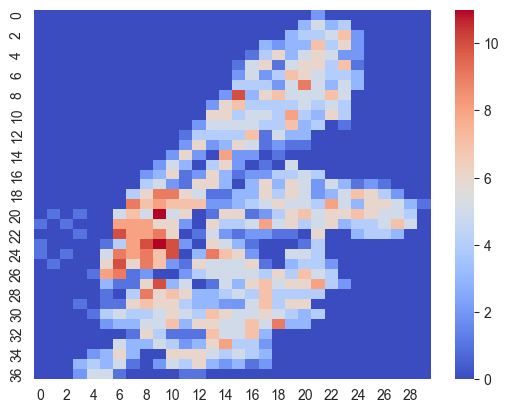

In [46]:
sns.heatmap(num_stations, cmap='coolwarm')

In [20]:
num_stations

[]

<Axes: >

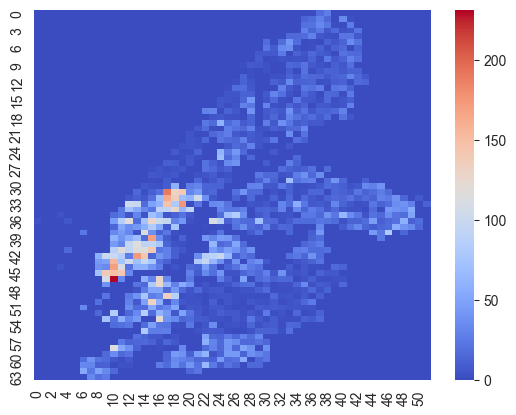

In [17]:
sns.heatmap(num_bikes_end, cmap='coolwarm')

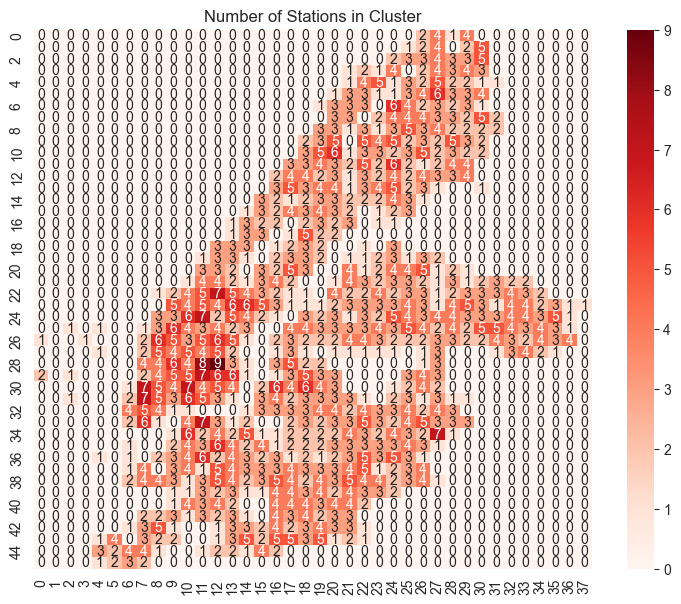

In [32]:
plt.close()
plt.subplots(figsize=(9,7))
plt.title('Number of Stations in Cluster')
sns.heatmap(num_stations, cmap='Reds', annot=True, fmt='d')
plt.savefig('images/stations.png')

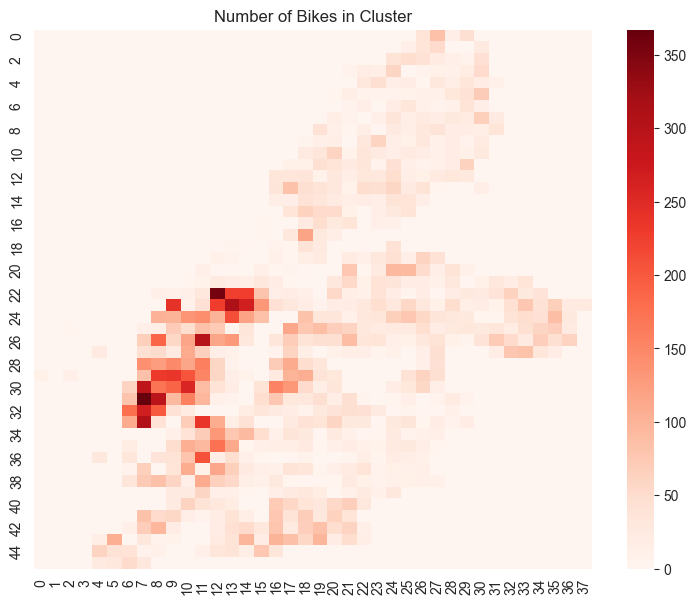

In [33]:
plt.close()
plt.subplots(figsize=(9,7))
plt.title('Number of Bikes in Cluster')
sns.heatmap(num_bikes_end, cmap='Reds')
plt.savefig('images/bikes.png')


In [93]:
origin_state = get_state(origin_path)
end_state = get_state(end_path)
origin_df = pd.DataFrame(origin_state.keys(), columns=['station'])
end_df = pd.DataFrame(end_state.keys(), columns=['station'])

origin_df['bikes'] = [origin_state[station].curr_bikes for station in origin_df['station']]
origin_df['cluster'] = 0
for i in range(len(clusters)):
    for station in clusters[i]:
        origin_df.loc[origin_df['station'] == station, 'cluster'] = i
# origin_df = origin_df.sort_values(by='cluster')
origin_df['frame'] = 1

end_df['bikes'] = [origin_state[station].curr_bikes for station in end_df['station']]
end_df['cluster'] = 0
for i in range(len(clusters)):
    for station in clusters[i]:
        end_df.loc[end_df['station'] == station, 'cluster'] = i
# end_df = end_df.sort_values(by='cluster')
end_df['frame'] = 2
